<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP4/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4.7 Señales Camineras

**El objetivo es obtener un modelo que determine el tipo de señal de tráfico, donde la dificultad es que las tomas fueron realizadas en condiciones realistas. Se provee un dataset etiquetado y dividido en las tres partes (train, validate, test).**

In [1]:
# Se cargan las librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
import cv2

In [2]:
# Download and unzip
dataroot = "dataroot/"
!mkdir dataroot 
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
!wget -P dataroot https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_3.zip

mkdir: cannot create directory ‘dataroot’: File exists
--2020-10-28 16:43:02--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32074743 (31M) [application/zip]
Saving to: ‘dataroot/data_1.zip.1’

data_1.zip.1        100%[===================>]  30.59M  38.8MB/s    in 0.8s    

2020-10-28 16:43:04 (38.8 MB/s) - ‘dataroot/data_1.zip.1’ saved [32074743/32074743]

--2020-10-28 16:43:04--  https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/data_2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.gith

In [3]:
# Unzip
import zipfile
with zipfile.ZipFile(dataroot+"data_1.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_2.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)
with zipfile.ZipFile(dataroot+"data_3.zip","r") as zip_ref:
    zip_ref.extractall(dataroot)

In [4]:
# Load sign names
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectRTS/data/signnames.csv")
signnames = pd.Series(df.SignName.values,index=df.ClassId).to_dict()
signnames

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [5]:
# Load images
img_train = pickle.load( open( dataroot+"train.p", "rb" ) )

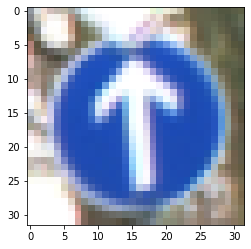

In [6]:
# Preview image
inx = 20000
plt.imshow(img_train['features'][inx])

In [ ]:
# Label correspodiente a esa imagen: 
print("The image shows a {} sign".format(signnames[img_train['labels'][inx]]))
print("Label:", img_train['labels'][inx])

The image shows a Ahead only sign
Label: 35


In [ ]:
# Se verifica el tamaño de cada imagen:
print('Shape', np.shape(img_train['features'][3]))
# Tamaño del Dataset de entrenamiento:
print('# Imagenes Train', len(img_train['features']))

Shape (32, 32, 3)
# Imagenes Train 34799


**Descriptor de Caractristicas de la Imagen**

Para realizar el entrenamiento del clasificador con las imagenes se utilizo como Descirptor de caracteriticas el Histograma de Gradientes Orientados HoG, para el cual se hizo uso de la libreria Opencv que ya lo tiene implementado

In [7]:
# Se definen los parametros básicos del Descriptor HoG

winSize = (32,32) # Tamaño de la Imagen
blockSize = (8,8) # Tamaño de Ventana deslizante
blockStride = (4,4) # Espaciado entre ventanas
cellSize = (4,4)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                           histogramNormType,L2HysThreshold,gammaCorrection,nlevels)


Histograma de gradientes orientados para una imagen:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


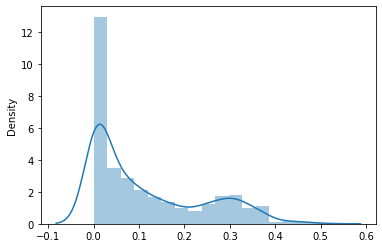

In [8]:
# Ejemplo del histograma HoG encontrado para la imagen que se visualizo previamente
img = img_train['features'][inx]
h = hog.compute(img)
sns.distplot(h)

Extracción de caracteristicas para todo el Dataset de Entrenamiento HoG

In [9]:
from tqdm import tqdm

def hog_imag(image):

  Data = np.array([])
  Target = []

  for i in tqdm(range(len(image['features']))):
    img = image['features'][i] # Se carga la Imagen
    h = hog.compute(img) # Se Obtienen las caracteristicas HoG
    h2 = h.ravel() # Se lleva a un array unidensional
    Data = np.hstack((Data, h2)) # Se carga a la matriz de entrenamiento
    Target.append(image['labels'][i]) # Se asigna el  correspondiente Label con base en la etiqueta de la imagen

  Data = Data.reshape((len(Target), len(h2))) # Se hace un reshape con base al numero de imagenes y caracteristicas encontradas
  return Data, Target

In [ ]:
# Al contar con un Dataset previamente Clasificado en Train, Validate y Test. No haremos uso de la herramienta Train_Test_Split
X_Train, y_train = hog_imag(img_train) # Asignamos el dataset de entrenamiento.

100%|██████████| 34799/34799 [39:05<00:00, 14.84it/s]


In [ ]:
# Tamaño del Dataset de Entrenamiento HoG
print('Shape Dataset Train HoG', X_Train.shape)

Shape Dataset Train HoG (34799, 1764)


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se Guarda el Dataset Train HoG para un uso posterior, ya que su obtención es un proceso que puede llegar a tomar mas de 40 min, esto debido a la catidad de imagenes a procesar. 

Guardar Datos:

In [ ]:
fichero = open("/content/drive/My Drive/Colab Notebooks/Trainin_Data","wb") # Se crea y guarda el Dataset Train HoG
pickle.dump(X_Train, fichero)
fichero.close()

In [ ]:
fichero2 = open("/content/drive/My Drive/Colab Notebooks/Training_Target","wb")# Se crea y guarda los Target del Dataset Train
pickle.dump(y_train, fichero2)
fichero2.close()

Carga de Datos:

In [11]:
fich = open("/content/drive/My Drive/Colab Notebooks/Trainin_Data","rb") # Cargando el Dataset Train HoG
X_Train = pickle.load(fich)

In [12]:
fich = open("/content/drive/My Drive/Colab Notebooks/Training_Target","rb") # Cargando el Dataset Train HoG
y_train = pickle.load(fich)

**Entrenamiento del Clasificador con SVM**

Para el primer Testeo haremos uso del clasificador SVM con caracteristicas estandar y sin hacer uso de Gridsearch o Crossvalidation

In [13]:
from sklearn.svm import SVC
import time
start_time = time.time()
clf = SVC(kernel="linear")
clf.fit(X_Train, y_train) # Entrenamiento del clasificador
print("--- %s Tiempo de ejecución en Minutos ---" % ((time.time() - start_time)/60)) # Tiempo total de entrenamiento

--- 7.384522012869517 Tiempo de ejecución en Minutos ---


Para poder Testear y/o validar el modelo con las imagenes que no hicierón parte del entrenamiento se deben estraer las caractristicas HoG de estas antes de aplicarlas al modelo

In [14]:
img_valid = pickle.load( open( dataroot+"valid.p", "rb" ) )
img_test = pickle.load( open( dataroot+"test.p", "rb" ) )

In [15]:
X_valid, y_valid = hog_imag(img_valid)

100%|██████████| 4410/4410 [00:45<00:00, 96.76it/s]


In [16]:
X_test, y_test = hog_imag(img_test)

100%|██████████| 12630/12630 [05:33<00:00, 37.88it/s]


Se predice la clase de las imagenes de Test y Valid con el modelo entrenado

In [17]:
y_pred = clf.predict(X_valid) #Predicción para las imagenes de Valid

In [18]:
y_pred2 = clf.predict(X_test) #Predicción para las imagenes de Test

In [20]:
from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(clf, metrics.classification_report(y_test, y_pred2)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        60
           1       0.80      0.89      0.85       720
           2       0.83      0.88      0.86       750
           3       0.80      0.82      0.81       450
           4       0.92      0.92      0.92       660
           5       0.82      0.79      0.80       630
           6       0.81      0.76      0.79       150
           7       0.93      0.88      0.90       450
           8       0.88      0.84      0.86       450
           9       0.98      0.99      0.99       480
          10       0.99      0.99      0.99       660
          11       0.87      0.91      0.89       420
       

En general con una configuración muy básica de SVM se logra un muy buen resultado. Al evaluar las imagenes de Test que no hicieron parte del entrenamiento se logro una exactitud de clasificación de 0.91. Lo cual inidica que el Descriptor HoG, es un muy buen descriptor de las caracteristicas generales, lo cual es indispensable para que cualquier tipo de clasificador de un resultado adecuado.

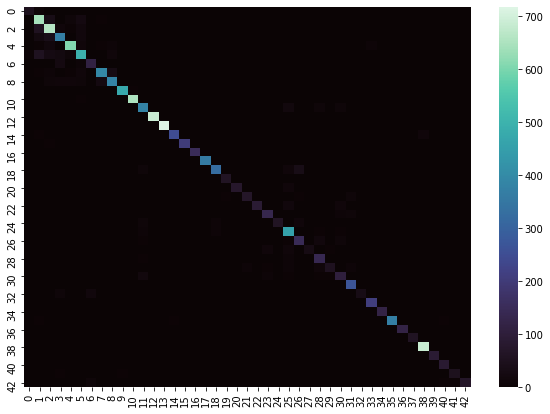

In [22]:
# Visualisamos la Matriz de confusión, con la cual se valida graficamente la clasificación del modelo
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred2)
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cnf_matrix, annot=False, cmap="mako")
plt.show()

**Aplicamos Validación cruzada al modelo para ver su rendimiento.**


In [23]:
# Se conforma un solo Dataset de entrenamiento con las Imagenes de Train y Valid
Data_cv = np.concatenate((X_Train, X_valid), axis=0)
Target_cv = np.concatenate((y_train, y_valid))

In [25]:
#Tamaño del Dataset de Entrenamiento
Data_cv.shape

(39209, 1764)

In [ ]:
from sklearn.model_selection import cross_val_score
import time
start_time = time.time()

cv_scores = cross_val_score(SVC(kernel="linear"), Data_cv, Target_cv, cv=10, n_jobs = -1)

print("Exactitud promedio (Varianza): %0.4f (+/- %0.4f)" % (cv_scores.mean(), cv_scores.std() * 2))
np.set_printoptions(precision=4)
print("Exactitud de cada fold= {}".format(cv_scores))
print("--- %s Tiempo de ejecución en Minutos ---" % ((time.time() - start_time)/60))

Exactitud Promedio (Varianza): 0.9429 (+/- 0.0209)
Exactitud de cada fold= [0.9523 0.9569 0.9528 0.9278 0.9388 0.9498 0.9475 0.925  0.9339 0.9439]


Aqui podemos Observar como la exactitud del modelo para cada fold se mantiene por encima de 0.92. logranod una exactitud promedio de 0.94, para los los 10 folds para los cuales se evaluo el modelo. Esto indica que en general el modelo generaliza adecuadamente los datos y no se esta sobreajustando a los datos de entrenamiento. 

**Aplicamos Gridsearch, para buscar los mejores hiperparametros del modelo SVM**

In [ ]:
from sklearn.model_selection import GridSearchCV
import time
start_time = time.time()
svm = SVC()
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']} # Parametros a encontrar
clf_Grid = GridSearchCV(svm, parameters, cv =10, n_jobs=-1) # Se define un Cross_validation = 3
clf_Grid.fit(X_valid, y_valid)
print("--- %s Tiempo de ejecución en Minutos ---" % ((time.time() - start_time)/60))

best_score = clf_Grid.best_score_
print("Mejor Resultado = {}".format(best_score))
best_params = clf_Grid.best_params_
print("Mejores parámetros = {}".format(best_params))

Despues de Ejecutar el metabuscador de parametros GridSearchCV no se lograron encontrar los parametros a evaluar por parte del clasificador SVM. Esto debido al tamaño del Dataset (39209 Imagenes a evaluar), al numero de atributos (1764) encontrados por HoG, a la cantidad de parametros a evaluar por Gridsearch dentro de estos CV.  El proceso toma demasiado tiempo, sobrepasando el tiempo maximo de simulación de Colab. Por lo cual se requieriria hacer la simulación en un PC directamente para lograr terminar la ejecución. 

Sin embargo tal y como se observo en el entrenamiento inicial el performance del modelo fue muy bueno, por encima de 0.91 y al aplicar validación cruzada involucrando las imagenes de Validación se logro una exactitud promedio de 0.94. Lo cual se indica que aunque el modelo se puede llegar a mejorar con uno u otro parametro, el resultado con los parametros básicos es bastante bueno y dependiendo de las necesidades podria llegar a ser conveniente tal y como se obtuvo. 

**Validamos algunos Targets reales y los obtenidos por el Clasificador SVM, para el Dataset de Test:**

In [68]:
inx = [1, 10 , 100, 1000, 10000] # Imagenes a evaluar dentro del Dataset Test
for a in inx: 
  print(a)
  print("Label:", y_test[a], "The image shows a {} ".format(signnames[y_test[a]]), "Real") # Target real de la Imagen
  print("Label:", y_pred2[a], "The image shows a {} ".format(signnames[y_pred2[a]]), "SVM_Clasificador") # Target asignado por el clasificador

1
Label: 1 The image shows a Speed limit (30km/h)  Real
Label: 1 The image shows a Speed limit (30km/h)  SVM_Clasificador
10
Label: 12 The image shows a Priority road  Real
Label: 12 The image shows a Priority road  SVM_Clasificador
100
Label: 1 The image shows a Speed limit (30km/h)  Real
Label: 1 The image shows a Speed limit (30km/h)  SVM_Clasificador
1000
Label: 17 The image shows a No entry  Real
Label: 17 The image shows a No entry  SVM_Clasificador
10000
Label: 27 The image shows a Pedestrians  Real
Label: 27 The image shows a Pedestrians  SVM_Clasificador
